# CWT Machine Learning Engineer Case Study

### Question 1: What are the different languages present in the tweets? What are the popular n-grams observable in the tweets?

The dataset is first loaded and tweets cleaned.

In [17]:
# import libraries

import pandas as pd
import numpy as np
import csv
import requests
import json
from datetime import date
import datetime
import time
import random
import pickle
import spacy
from nltk.corpus import stopwords
import nltk
import string
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.utils import shuffle
import ast
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, LinearSVC, SVC, SVR
from sklearn.metrics import mean_squared_error
from datetime import datetime
import re
import warnings
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import unicodedata

In [2]:
# load dataset
tweet_df = pd.read_csv("twitter_dataset.csv")
tweet_df

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,...,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,durham nc,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,NaN
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,NaN,NaN,0,0,...,Canada,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,...,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,...,Providence,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42363,Tue Dec 20 00:25:13 +0000 2016,811004491378073600,#BusinessInsider Your Money #Travel The Bigges...,False,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,NaN,NaN,0,0,...,"ÜT: 43.484417,-79.720563",- Owner of - QB Sports and The Judge & Jury - ...,http://t.co/aUs1RvWTzE,http://www.bostonmanor.ca/,537,170,90,Mon Jan 11 00:36:46 +0000 2010,22170,NaN
42364,Tue Dec 20 00:25:12 +0000 2016,811004490300223492,.@jessicaparsons @brokegirlsdiary #rockstar #D...,False,"<a href=""http://www.facebook.com/twitter"" rel=...",NaN,NaN,NaN,0,0,...,Los Angeles,Talent | Literary | Production,https://t.co/6g3HhXQBkh,https://pro-labs.imdb.com/company/co0499796/,2635,1870,321,Sat Sep 13 19:18:55 +0000 2014,15266,NaN
42365,Tue Dec 20 00:25:12 +0000 2016,811004489813495808,"RT @StylishRentals: Love this! ""Dragonfly Dese...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3043,0,...,NaN,"udemy instructor, author, marketeer, into tech...",NaN,NaN,91,54,83,Thu Sep 01 23:19:19 +0000 2016,23419,NaN
42366,Tue Dec 20 00:25:12 +0000 2016,811004488932737024,"RT @StylishRentals: Love this! ""Dragonfly Dese...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3043,0,...,NaN,Keep track of your cryptocurrencies and genera...,NaN,NaN,68,50,63,Fri Sep 02 17:16:12 +0000 2016,20737,NaN


In [3]:
# Remove all @, RTs, links and hashtags within tweets
tweet_df["TweetBody"] = tweet_df["TweetBody"].apply(lambda x: " ".join([keyword for keyword in x.split(" ") if "@" not in keyword and "#" not in keyword and "RT" not in keyword and "https" not in keyword]))
tweet_df["TweetBody"].iloc[0]

'Local interaction is a great way to gain insight into the Maldivian way of life.'

In [4]:
# Detect language for each sentence
import cld3
tweet_df["tweet_lang"] = tweet_df["TweetBody"].apply(lambda x: cld3.get_language(x).language if len(x.strip())>0 and any(letter.isalpha() for letter in x) and float(cld3.get_language(x).probability) >= 0.95 else "")

In [5]:
tweet_df["tweet_lang"].unique()

array(['en', '', 'fr', 'es', 'it', 'lb', 'el-Latn', 'sn', 'nl', 'pt',
       'sr', 'ms', 'fy', 'ja', 'tr', 'bg', 'pl', 'zh', 'ca', 'ru', 'jv',
       'no', 'xh', 'id', 'co', 'hi', 'sl', 'fil', 'af', 'de', 'mg', 'ig',
       'sv', 'la', 'th', 'te', 'el', 'hi-Latn', 'ht', 'mt', 'gl', 'et',
       'ko', 'so', 'haw', 'cs', 'hy', 'yo', 'da', 'vi', 'sk', 'ro', 'eu',
       'ky', 'sm', 'sw', 'zh-Latn', 'mi', 'fi', 'ta', 'ml', 'gd', 'ar',
       'uz', 'ceb', 'ga', 'st', 'ny', 'lt', 'zu', 'cy', 'ru-Latn', 'az',
       'eo', 'fa', 'lv', 'su', 'kk', 'ja-Latn', 'uk', 'hu', 'bg-Latn',
       'iw', 'ha', 'tg'], dtype=object)

In [6]:
import pycountry
# convert iso639 codes into full language names
tweet_df["tweet_lang"] = tweet_df["tweet_lang"].apply(lambda x: pycountry.languages.get(alpha_2=x).name if x!='' and pycountry.languages.get(alpha_2=x) is not None else '')
print(tweet_df["tweet_lang"].unique())

['English' '' 'French' 'Spanish' 'Italian' 'Luxembourgish' 'Shona' 'Dutch'
 'Portuguese' 'Serbian' 'Malay (macrolanguage)' 'Western Frisian'
 'Japanese' 'Turkish' 'Bulgarian' 'Polish' 'Chinese' 'Catalan' 'Russian'
 'Javanese' 'Norwegian' 'Xhosa' 'Indonesian' 'Corsican' 'Hindi'
 'Slovenian' 'Afrikaans' 'German' 'Malagasy' 'Igbo' 'Swedish' 'Latin'
 'Thai' 'Telugu' 'Modern Greek (1453-)' 'Haitian' 'Maltese' 'Galician'
 'Estonian' 'Korean' 'Somali' 'Czech' 'Armenian' 'Yoruba' 'Danish'
 'Vietnamese' 'Slovak' 'Romanian' 'Basque' 'Kirghiz' 'Samoan'
 'Swahili (macrolanguage)' 'Maori' 'Finnish' 'Tamil' 'Malayalam'
 'Scottish Gaelic' 'Arabic' 'Uzbek' 'Irish' 'Southern Sotho' 'Nyanja'
 'Lithuanian' 'Zulu' 'Welsh' 'Azerbaijani' 'Esperanto' 'Persian' 'Latvian'
 'Sundanese' 'Kazakh' 'Ukrainian' 'Hungarian' 'Hausa' 'Tajik']


In [7]:
tweet_df["tweet_lang"].value_counts()[:50]

                         22565
English                  18375
Spanish                    287
French                      97
Italian                     79
Japanese                    72
German                      61
Luxembourgish               57
Western Frisian             53
Indonesian                  48
Portuguese                  46
Corsican                    35
Dutch                       34
Javanese                    34
Russian                     31
Norwegian                   29
Afrikaans                   27
Serbian                     26
Slovak                      25
Latin                       25
Catalan                     24
Igbo                        22
Thai                        21
Danish                      21
Galician                    21
Chinese                     21
Malay (macrolanguage)       14
Polish                      13
Korean                      12
Estonian                    11
Nyanja                      11
Malagasy                    11
Welsh   

The above list contains all the different languages present in the tweets. Only tweets detected with a very high confidence (higher than 0.95) were labeled. English seems to be the most recurrent language by far. Let's focus on the english language and remove english stopwords before listing most popular n-grams.

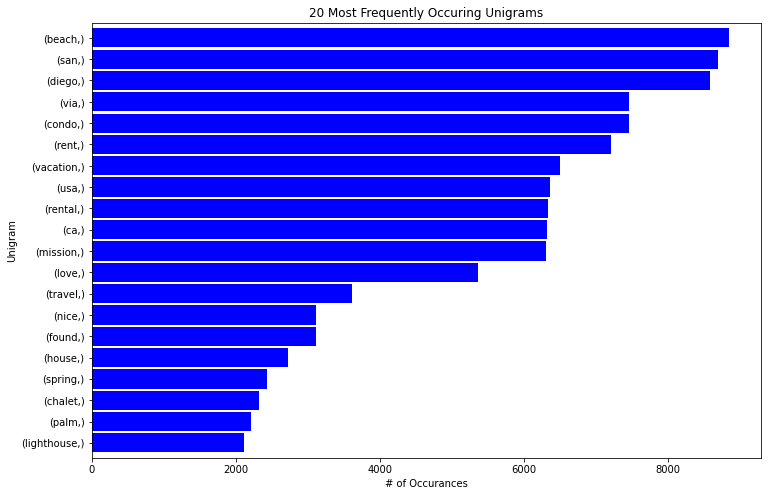

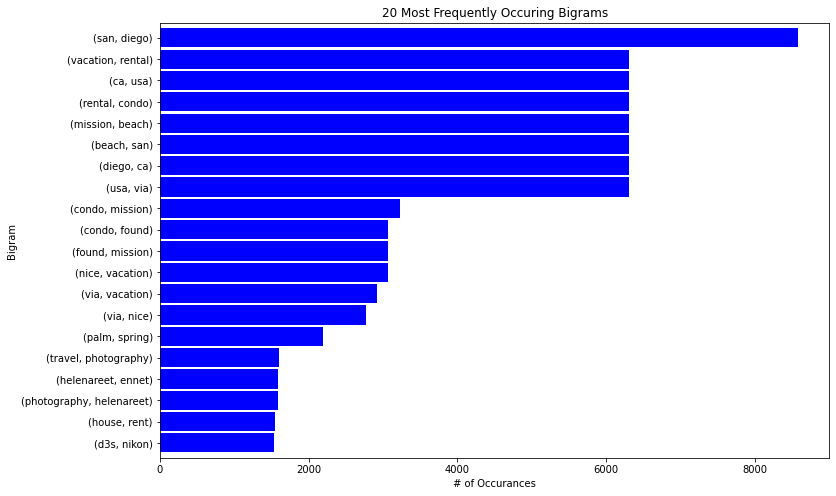

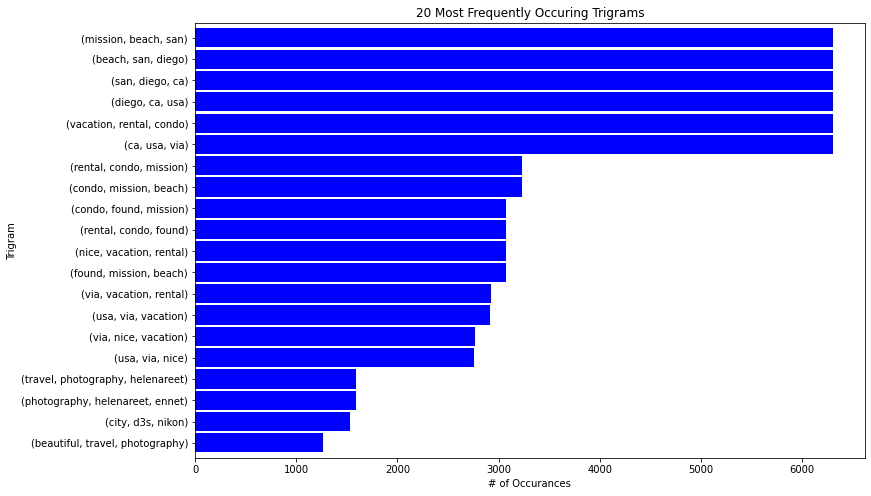

In [8]:
def basic_clean(text):
  """
  A simple function to clean up the data. All words that
  are not designated as a stop word are then lemmatized after
  encoding and basic regex parsing is performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ['amp']
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

# Clean tweets more thorouly with english stopwords removed, lemmatization and text lowercased
words = basic_clean(''.join(str(tweet_df["TweetBody"].tolist())))

#compute most populat n-grams
unigrams_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:20]
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

# Visualize 20 most popular n-grams
unigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Unigrams')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')
plt.show()

bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.show()

trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')
plt.show()

The most common keywords used in tweets seem to be about travel, photography, vacation and rentals which makes sense. A region seems particularly targeted: California. 

### Question 2: Unsupervised Learning Modeling Task: Based on the twitter texts (TweetBody column) alone, what are the popular clusters/topics of text this group of users have been tweeting about? What are the assumptions made by your solution?

The first step is to clean the text of each tweet again. Keywords can then be vectorized with a CountVectorizer or TF-IDF. Then K-means can be used as a clustering algorithm. It assumes data points are distributed in a spherical manner. The number of clusters is chosen based on the inertia for each cluster number. PCA is then applied in order to reduce the dimensionality of the dataset to 2 components so that clusters can be visualized.

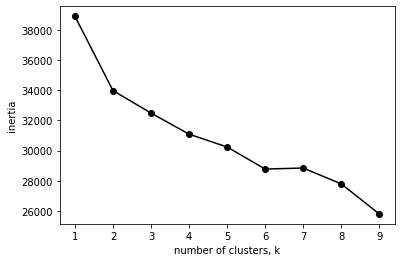

In [11]:
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This function cleans the input text by
    - removing special chars
    - removing numbers
    - removing stopwords
    - transforming in lower case
    - removing excessive whitespaces
    """
    wnl = nltk.stem.WordNetLemmatizer()
    # remove numbers and special chars
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. creates tokens
        tokens = nltk.word_tokenize(text)
        # 2. checks if token is a stopword and removes it
        stopwords = nltk.corpus.stopwords.words('english') + ['amp']
        tokens = [wnl.lemmatize(w) for w in tokens if not w.lower() in stopwords]
        # 3. joins all tokens again
        text = " ".join(tokens)
    # returns cleaned text
    text = text.lower().strip()
    return text

# Preprocess each tweet but keeping them separate this time
tweet_df["TweetBody"] = tweet_df["TweetBody"].apply(lambda x: preprocess_text(x, remove_stopwords=True))

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(tweet_df["TweetBody"])

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

the slope of the curve starts decreasing after the 5th cluster, which is why the number of clusters was set to 5.

In [12]:
# initialize kmeans with 5 centroids
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_


# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

tweet_df['cluster'] = clusters
tweet_df['x0'] = x0
tweet_df['x1'] = x1

def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(20)


Cluster 0
tip,christmas,top,amazing,world,hotel,get,season,book,holiday,day,new,gt,via,best,daily,please,thanks,latest,travel

Cluster 1
flavor,foodborne,foggy,florida,rent,step,condominium,cozy,nice,found,via,vacation,usa,rental,ca,mission,condo,beach,san,diego

Cluster 2
fluff,fly,flying,force,fm,fodor,foggy,folk,follow,following,food,foodborne,foodie,fool,foot,fodhdhoo,zzzz,mm,city,nikon

Cluster 3
wagon,crafted,tahoe,celeste,wing,neck,pocasset,room,guest,breakfast,bed,owl,hightown,spring,palm,chalet,lighthouse,house,love,rent

Cluster 4
fodor,flower,foggy,follow,following,florence,food,foodborne,foodie,flight,fool,foot,folk,wonderful,travel,beautiful,photography,helena,reet,ennet


5 main clusters can be identified: Words starting with f, food/photography, holiday on the beach in california, rentals in Palm spring, and questions/tips about travelling.

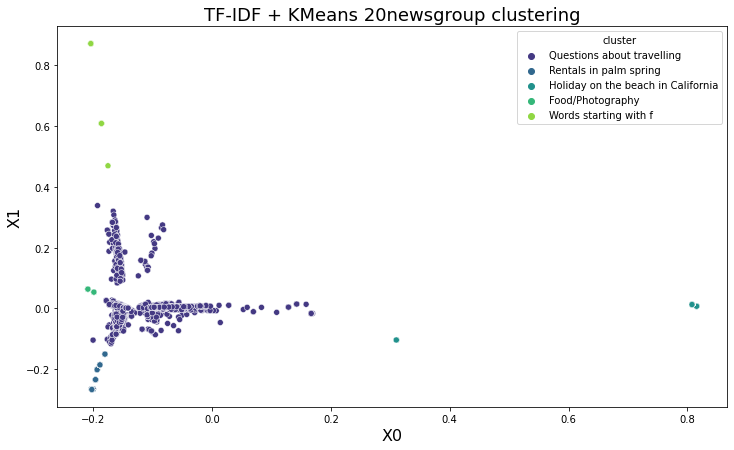

In [13]:
import seaborn as sns

# map clusters to appropriate labels 
cluster_map = {2: "Words starting with f", 1: "Holiday on the beach in California", 0:"Questions about travelling",3:"Rentals in palm spring",4:"Food/Photography"}
# apply mapping
tweet_df['cluster'] = tweet_df['cluster'].map(cluster_map)

# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=tweet_df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

The k-means algorithm seems to pick up on outliers as it assumes the data is spherical and evenly distributed, which is not the case. DB-scan was tested in order to have a clearer separation within the main group but it did not work well either.

### Question 3: From the model built in Question 2, to what extent could you improve the model by incorporating additional information provided in the dataset? What the implications of doing so?

The current model only takes into account bare text as an input and is giving an equal weight to all of them. The user's country could be used to target specific populations as British people tweeting about going to San Diego does not mean the same as Californians posting the same tweet.
Also, the number of retweets could be used to order to assess how many people aggree with each tweet, which would change the weight given to each sentence.
Hashtags could also be included as they constitute strong keywords.
This would mean adding more text to each tweet: country name + hashtags + keywords repeated n times based on the level of retweet.
Duplicated tweets from the same user using its userID could be filtered out.
Also, rows that are replies to another tweet could be filtered out in order to only keep original posts.

### Question 4: Build an API that can infer the topics/clusters given an input of a new tweet powered by your model trained in the Question 2 above.

In [14]:
# Preprocess each tweet but keeping them separate this time
def infer_cluster(text):
    text_s = pd.Series([text])
    text_s = text_s.apply(lambda x: " ".join([keyword for keyword in x.split(" ") if "@" not in keyword and "#" not in keyword and "RT" not in keyword and "https" not in keyword]))
    text_s = text_s.apply(lambda x: preprocess_text(x, remove_stopwords=True))

    X_test = vectorizer.transform(text_s)
    prediction = kmeans.predict(X_test)
    cluster_name = cluster_map[prediction[0]]
    return cluster_name

test_tweet = "At the beach in San Diego! #sunny #california"
print("input tweet:", test_tweet, "\ninfered tweet:", infer_cluster(test_tweet))

test_tweet = "does anyone have any travel tips? #travel"
print("\ninput tweet:", test_tweet, "\ninfered tweet:", infer_cluster(test_tweet))

test_tweet = "love this new rental in palm spring  #holiday"
print("\ninput tweet:", test_tweet, "\ninfered tweet:", infer_cluster(test_tweet))

input tweet: At the beach in San Diego! #sunny #california 
infered tweet: Holiday on the beach in California

input tweet: does anyone have any travel tips? #travel 
infered tweet: Questions about travelling

input tweet: love this new rental in palm spring  #holiday 
infered tweet: Rentals in palm spring


### Question 5: What are the actionable business insight that can be drawn from this dataset?

This dataset shows that most users are looking for travel and rental tips. Adding personalized recommendations to the product would probably make it very appealing. 
A few datapoints show that some users are very excited about holidays on the beach and specifically in California. It might be good to include more rentals from this area within the product.
Food and photography seem to stand out as well. If services are part of the product offering, they should definitly be included.

### Question 6: [Optional] Design and build a supervised learning model that can predict the number of tweet favourite (TweetFavoritesCount column).

In [15]:
# Create training/validation set separation
tweet_df_val_zeros = tweet_df[tweet_df["TweetFavoritesCount"]==0].sample(n=10, random_state=27) 
tweet_df = tweet_df[~tweet_df.isin(tweet_df_val_zeros)].dropna(subset=["TweetRetweetCount","UserFollowersCount","UserFriendsCount","UserListedCount","UserTweetCount"])
print(tweet_df_val_zeros["TweetFavoritesCount"])

tweet_df_val_non_zeros = tweet_df[tweet_df["TweetFavoritesCount"]!=0].sample(n=10, random_state=27) 
tweet_df = tweet_df[~tweet_df.isin(tweet_df_val_non_zeros)].dropna(subset=["TweetRetweetCount","UserFollowersCount","UserFriendsCount","UserListedCount","UserTweetCount"])
print(tweet_df_val_non_zeros["TweetFavoritesCount"])

# Upsample minority class
tweet_df_majority = tweet_df[tweet_df.TweetFavoritesCount==0]
tweet_df_minority = tweet_df[tweet_df.TweetFavoritesCount!=0]

print("Percentage of non zeros in target before upsample: ", len(tweet_df[tweet_df["TweetFavoritesCount"]!=0])/len(tweet_df["TweetFavoritesCount"])*100,"%")

# Upsample minority class
tweet_df_minority_upsampled = resample(tweet_df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=tweet_df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
tweet_df = pd.concat([tweet_df_majority, tweet_df_minority_upsampled])

print("Percentage of non zeros in target after upsample: ", len(tweet_df[tweet_df["TweetFavoritesCount"]!=0])/len(tweet_df["TweetFavoritesCount"])*100,"%")

X = tweet_df[["TweetRetweetCount","UserFollowersCount","UserFriendsCount","UserListedCount","UserTweetCount"]]
y = tweet_df["TweetFavoritesCount"]

print(X.describe())
print("---")
print(y.describe())

34685    0
39213    0
40061    0
13782    0
17874    0
17069    0
15442    0
40598    0
34263    0
38705    0
Name: TweetFavoritesCount, dtype: int64
10163    1.0
10878    1.0
6485     1.0
10998    2.0
10782    1.0
25000    5.0
31042    1.0
35486    1.0
24473    1.0
40566    1.0
Name: TweetFavoritesCount, dtype: float64
Percentage of non zeros in target before upsample:  9.799754415792954 %
Percentage of non zeros in target after upsample:  50.0 %
       TweetRetweetCount  UserFollowersCount  UserFriendsCount  \
count       76396.000000        7.639600e+04      76396.000000   
mean          602.500864        1.361002e+04       7529.047005   
std          1196.003835        1.095463e+05      31159.902020   
min             0.000000        0.000000e+00          0.000000   
25%             0.000000        7.200000e+01         63.000000   
50%             1.000000        7.830000e+02        846.000000   
75%            50.000000        4.952000e+03       3207.250000   
max          4056.00

The dataset is separated into a training and validation set. As there is a large majority of zeros, 20 random samples are selected - 10 with a target at zero and 10 at non zero. Also, a such unbalanced dataset leads to a model predicting zero all the time and skews the training. This is why the non zero values were upsampled.
There are no missing values in the dataset. There are users with a very high number of followers (4M), friends and tweet count, but it could still be possible.

In [19]:
import warnings
warnings.filterwarnings("ignore")

# Try dumb baseline without ML
print("Dumb baseline mse",  mean_squared_error(y, [np.mean(y) for i in range(len(y))]))

# Try different models
classifier = LinearRegression()
print("LR scaled cross val score mse", np.abs(cross_val_score(classifier, X, y, cv=10, scoring='neg_mean_squared_error')).mean())
classifier = SVR()
print("SVR cross val score mse", np.abs(cross_val_score(classifier, X, y, cv=10, scoring='neg_mean_squared_error')).mean())
classifier = MLPRegressor(random_state=1, max_iter=1000)
print("MLP cross val score mse", np.abs(cross_val_score(classifier, X, y, cv=10, scoring='neg_mean_squared_error')).mean())
classifier = GradientBoostingRegressor(random_state=27)
print("XGBR cross val score mse", np.abs(cross_val_score(classifier, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

Dumb baseline mse 6740.33170727659
LR scaled cross val score mse 6750.756202047809
SVR cross val score mse 6734.249343173877
MLP cross val score mse 82629.81352785048
XGBR cross val score mse 179.9810705289283


The XgBoost model performs much better than other models and has a MSE which is much lower than the baseline without Machine Learning.

In [20]:
# Predict number of tweet favourite from the validation set
classifier.fit(X,y)
pred_zeros = classifier.predict(tweet_df_val_zeros[["TweetRetweetCount","UserFollowersCount","UserFriendsCount","UserListedCount","UserTweetCount"]])
pred_non_zeros = classifier.predict(tweet_df_val_non_zeros[["TweetRetweetCount","UserFollowersCount","UserFriendsCount","UserListedCount","UserTweetCount"]])

y_val_zeros = tweet_df_val_zeros["TweetFavoritesCount"]
y_val_non_zeros = tweet_df_val_non_zeros["TweetFavoritesCount"]

y_mean_baseline = np.mean(y)

# Baseline's performance
MAE_zeros_baseline = np.mean([np.abs(y_mean_baseline-y_val_zeros.iloc[i]) for i in range(len(y_val_zeros))])
print("MAE of baseline for zeros:", MAE_zeros_baseline)
MAPE_non_zeros_baseline = np.mean([np.abs(y_mean_baseline-y_val_non_zeros.iloc[i])/float(y_val_non_zeros.iloc[i]) for i in range(len(y_val_non_zeros))])*100
print("MAPE of baseline for non zeros:", MAPE_non_zeros_baseline,"%")

# XgBoost regressor's performance
MAE_zeros = np.mean([np.abs(pred_zeros[i]-y_val_zeros.iloc[i]) for i in range(len(pred_zeros))])
print("MAE of model for zeros:", MAE_zeros)
MAPE_non_zeros = np.mean([np.abs(pred_non_zeros[i]-y_val_non_zeros.iloc[i])/float(y_val_non_zeros.iloc[i]) for i in range(len(y_val_non_zeros))])*100
print("MAPE of model for non zeros:", MAPE_non_zeros,"%")

MAE of baseline for zeros: 3.954251531493795
MAPE of baseline for non zeros: 248.20287711398498 %
MAE of model for zeros: 0.37740281551391863
MAPE of model for non zeros: 66.498501883331 %


The model has a much lower MAE compared to the baseline when trying to predict zero values (0.4 vs 4) and achieves a lower mean average percentage error as well when predicting non zero values (66% vs 248%).